# Men versus women users of Pronto. 

First, we load the data

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import defaultdict

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [4]:
stations = pd.read_csv('station.csv')
trips = pd.read_csv('trip.csv', error_bad_lines=False)

#trips = pd.read_csv("../input/trip.csv")
weathers = pd.read_csv('weather.csv')

#stations.head()

b'Skipping line 50794: expected 12 fields, saw 20\n'


## Introduction and motivations

I live in Montreal, and we have a similar service here called Bixi. Even though this service was not profitable for the private operator, the city bought the service and keeps it alive because it is a usefull public service. 

I have heard that here in Montreal, women are more reluctant to active transportation then men. I am wondering if the same trend can be observed in Seattle and if the inability of Pronto to attract women could have contributed to its failure.

Let's look at some representations to appreciate the profiles of typical users. Let's look at at gender distribution first.

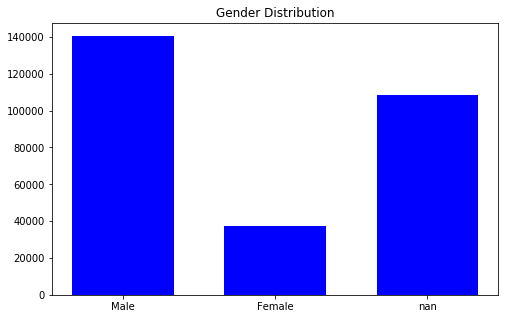

In [5]:
trips.gender
trips.gender.replace('Other', np.nan, inplace=True)

# count genders
counts = defaultdict(int)
for e in trips.gender:
    counts[e] += 1
    
# Gender distribution
y = [e[1] for e in counts.items()][:4]
x = range(len(y))
cols = [e[0] for e in counts.items()][:4]
    
plt.figure(figsize=(8,5))
plt.bar(x, y, color='blue', width=1/1.5)
plt.xticks(x, cols)
plt.title('Gender Distribution')
plt.show()

In this plot we have merged the "Other" category with the Nan's.

At first glance, it looks like the service is more popular among guys. But why?

Second, there are a lot of Nan's. This is because "Non-members", i.e. temporary pass holder, do not provide any information about their gender (neither about their age) at the pruchase of the pass. It would be intersting to know a litle more about them. It might enlighten us on why Pronto failed to convert some of these "occasionnal users" into annual members.

The wrap-up, here are the two main goals of this study:

1. Discover gender or age related peculiarities in the usage of this service  

2. Can we predict the sex or the age of one of "non-members" based on the other information we have about them using some kind of regression?

Let's get started!

## Question 1 : age and gender

In [6]:
# Bikes with trip duration
import numbers

bike_stats = defaultdict(int)
dur_stats = defaultdict(float)

age_all_stats = defaultdict(int)
age_notnan_stats = defaultdict(int)
age_fem_stats = defaultdict(int)
age_male_stats = defaultdict(int)
age_memb_stats =defaultdict(int)

agedur_all_stats = defaultdict(int)
agedur_notnan_stats = defaultdict(int)
agedur_fem_stats = defaultdict(int)
agedur_male_stats = defaultdict(int)
agedur_memb_stats = defaultdict(int)
counter = 0

print(age_fem_stats)

from datetime import datetime

for t in trips.itertuples():
    trip_start = datetime.strptime(t.starttime, '%m/%d/%Y %H:%M')
    trip_riderage = - t.birthyear + trip_start.year
    
    #Analysis age gender
 
    if isinstance(t.tripduration, numbers.Number) and t.tripduration > 1:
        counter += 1
        print(counter, end="\r")
        agedur_all_stats[str(trip_riderage)] += t.tripduration # trip duration age birth year
        age_all_stats[str(trip_riderage)] += 1
        if t.gender != np.nan:
            agedur_notnan_stats[str(trip_riderage)] += t.tripduration # trip duration age birth year
            age_notnan_stats[str(trip_riderage)] += 1
            if t.gender == "Female":
                agedur_fem_stats[str(trip_riderage)] += t.tripduration # trip duration age birth year
                age_fem_stats[str(trip_riderage)] += 1
            elif t.gender == "Male":
                agedur_male_stats[str(trip_riderage)] += t.tripduration # trip duration age birth year
                age_male_stats[str(trip_riderage)] += 1

        #Analysis age user type
        if t.usertype == "Member":
            agedur_memb_stats[str(trip_riderage)] += t.tripduration
            age_memb_stats[str(trip_riderage)] += 1
        
    bike_stats[t.bikeid] += 1
    dur_stats[t.bikeid] += t.tripduration

keys = sorted(age_all_stats.keys())[:-1] # without nan

print("done")

defaultdict(<class 'int'>, {})
done57


c:\users\david\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


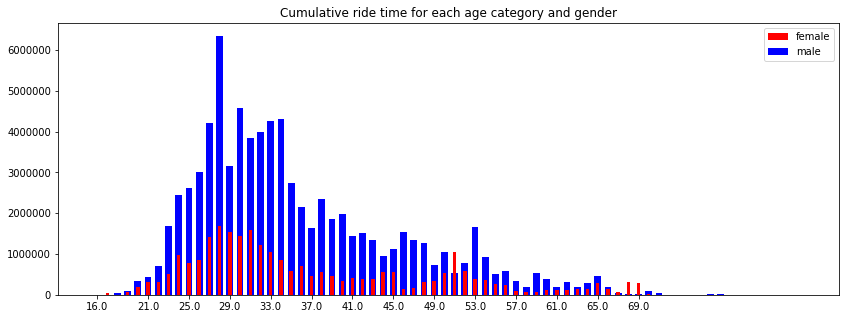

In [10]:
# Age distribution

import operator

#Exctract list of keys in each dictionary
ydur_all = [agedur_all_stats[k] for k in sorted(agedur_all_stats.keys())[:-1]]
ydur_notnan = [agedur_notnan_stats[k] for k in sorted(agedur_notnan_stats.keys())[:-1]]
ydur_fem = [agedur_fem_stats[k] for k in sorted(agedur_fem_stats.keys())[:-1]]
ydur_male = [agedur_male_stats[k] for k in sorted(agedur_male_stats.keys())[:-1]]
ydur_memb =  [agedur_memb_stats[k] for k in sorted(agedur_memb_stats.keys())[:-1]]

y_all = [age_all_stats[k] for k in sorted(age_all_stats.keys())[:-1]]
y_notnan = [age_notnan_stats[k] for k in sorted(age_notnan_stats.keys())[:-1]]
y_fem = [age_fem_stats[k] for k in sorted(age_fem_stats.keys())[:-1]]
y_male = [age_male_stats[k] for k in sorted(age_male_stats.keys())[:-1]]
y_memb =  [age_memb_stats[k] for k in sorted(age_memb_stats.keys())[:-1]]

#Compute new lists
ydur_notmemb = list(map(operator.sub, ydur_all, ydur_memb))
y_notmemb = list(map(operator.sub, y_all, y_memb))

yavdur_male = list(map(operator.truediv, ydur_male, y_male))
yavdur_fem = list(map(operator.truediv, ydur_fem, y_fem))
yavdur_memb = list(map(operator.truediv, ydur_memb, y_memb))
yavdur_notmemb = list(map(operator.truediv, ydur_notmemb, y_notmemb))

# evalutate with histogram
plt.figure(figsize=(14,5))
keys = sorted(agedur_male_stats.keys())[:-1] 
x = list(map(float, keys))
maleplot = plt.bar(x, ydur_male, color='blue', width=1/1.5, label = 'male')
keys = sorted(agedur_fem_stats.keys())[:-1] 
x = list(map(float, keys))
femaleplot = plt.bar(x, ydur_fem, color='red', width=0.5/1.5, label = 'female')
#plt.hist(cols, 10)
plt.xticks(x[0::4], [e for e in x[0::4]])
#plt.axis([minyear, maxyear, minamp, maxamp])
plt.title('Cumulative ride time for each age category and gender')
lines = [femaleplot, maleplot]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels)
plt.show()


Here we observe two things:
1. Mens travel a lot more than womens with Pronto
2. 28 years old men seam to use the service a lot. The service is used a lot by young adults between 25 and 35 years old.

It would have been nice to have the user unique ID for each trip. This way we could have checked if this discrency between women and men is due to A) the fact that there are more men who suscribe for the service or B) the fact that men actually uses the service more than women.

Let's dig further in the Men versus Women aspect of things.

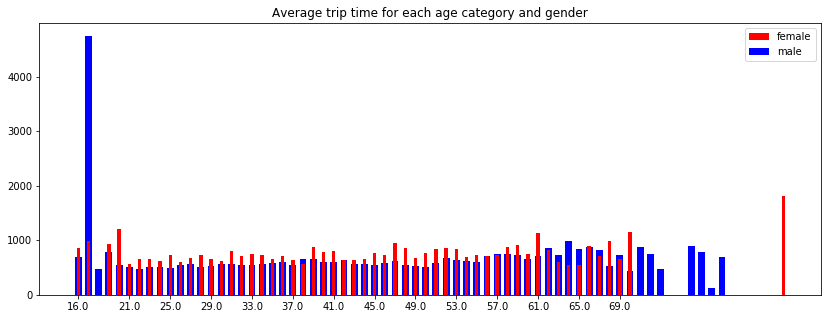

In [11]:
# evalutate with histogram

plt.figure(figsize=(14,5))

keys = sorted(agedur_male_stats.keys())[:-1] 
x = list(map(float, keys))
maleplot = plt.bar(x, yavdur_male, color='blue', width=1/1.5, label = 'male')

keys = sorted(agedur_fem_stats.keys())[:-1] 
x = list(map(float, keys))
femaleplot = plt.bar(x, yavdur_fem, color='red', width=0.5/1.5, label = 'female')

#plt.hist(cols, 10)
plt.xticks(x[0::4], [e for e in x[0::4]])
#plt.axis([minyear, maxyear, minamp, maxamp])
plt.title('Average trip time for each age category and gender')
lines = [femaleplot, maleplot]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels)
plt.show()

Interesting! Womens tend to stay on their bikes longer then guys. Is it that guys ride faster then girls ;) ? Let's validate this assumption by calculating the distance between the departure and the arrival station (distance as the crow flies).

In [12]:
#Function to compute the distance between two point given their latitude and longitude
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [13]:
#Home-made function for the purpose of calculating distance
def calc_dist(stnIDa, stnIDb):
    Alat = 0
    Along = 0
    Blat = 0
    Blong = 0
    distance = 0
    for s in stations.itertuples():
        if s.station_id == stnIDa:
            Alat = s.lat
            Along = s.long
        if s.station_id == stnIDb:
            Blat = s.lat
            Blong = s.long
    if Alat != 0 and Blat != 0 and Along != 0 and Blong != 0:
        distance = abs(haversine(Along, Alat, Blong, Blat))
    return distance

In [14]:
#test the new distance calculation function (ouput in km)
distance = calc_dist(trips.from_station_id[11], trips.to_station_id[11]) 
print(distance)

0.3132529930518943


In [15]:
#This code takes forever to run but outputs distances for each trips
dist_all = defaultdict(int)
dist_men = defaultdict(int)
dist_fem = defaultdict(int)
dist_memb = defaultdict(int)
counter = 0

for t in trips.itertuples():
    trip_start = datetime.strptime(t.starttime, '%m/%d/%Y %H:%M')
    trip_riderage = - t.birthyear + trip_start.year
    distance = calc_dist(t.from_station_id, t.to_station_id)
    
    #Analysis age and gender
 
    if distance > 0:
        counter += 1
        print(counter, end="\r")
        dist_all[str(trip_riderage)] += distance # trip duration age birth year
        if t.gender != np.nan:
            if t.gender == "Female":
                dist_fem[str(trip_riderage)] += distance # trip duration age birth year
            elif t.gender == "Male":
                dist_men[str(trip_riderage)] += distance # trip duration age birth year

        #Analysis age user type
        if t.usertype == "Member":
            dist_memb[str(trip_riderage)] += distance
            
print("Done!")
            

Done!6


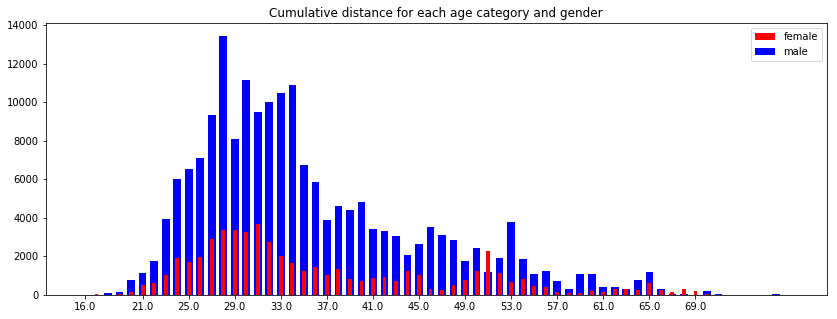

In [16]:
d_all = [dist_all[k] for k in sorted(dist_all.keys())[:-1]]
dur_all = [agedur_all_stats[k] for k in sorted(dist_all.keys())[:-1]]
num_all = [age_all_stats[k] for k in sorted(dist_all.keys())[:-1]]
d_men = [dist_men[k] for k in sorted(dist_men.keys())[:-1]]
dur_men = [agedur_male_stats[k] for k in sorted(dist_men.keys())[:-1]]
num_men = [age_male_stats[k] for k in sorted(dist_men.keys())[:-1]]
d_fem = [dist_fem[k] for k in sorted(dist_fem.keys())[:-1]]
dur_fem = [agedur_fem_stats[k] for k in sorted(dist_fem.keys())[:-1]]
num_fem = [age_fem_stats[k] for k in sorted(dist_fem.keys())[:-1]]

d_memb = [dist_memb[k] for k in sorted(dist_memb.keys())[:-1]]
dur_memb = [agedur_memb_stats[k] for k in sorted(dist_memb.keys())[:-1]]
d_nonmemb = list(map(operator.sub, [dist_all[k] for k in sorted(dist_memb.keys())[:-1]], d_memb))

spd_all = list(map(operator.truediv, d_all, 2.77777e-4 * np.float32(dur_all)))
spd_men = list(map(operator.truediv, d_men, 2.77777e-4 * np.float32(dur_men)))
spd_fem = list(map(operator.truediv, d_fem, 2.77777e-4 * np.float32(dur_fem)))

avd_all = list(map(operator.truediv, d_all, num_all))
avd_men = list(map(operator.truediv, d_men, num_men))
avd_fem = list(map(operator.truediv, d_fem, num_fem))

# evalutate with histogram
plt.figure(figsize=(14,5))

keys = sorted(dist_men.keys())[:-1] 
x = list(map(float, keys))
maleplot = plt.bar(x, d_men, color='blue', width=1/1.5, label = 'male')

keys = sorted(dist_fem.keys())[:-1] 
x = list(map(float, keys))
femaleplot = plt.bar(x, d_fem, color='red', width=0.5/1.5, label = 'female')

#plt.hist(cols, 10)
plt.xticks(x[0::4], [e for e in x[0::4]])
#plt.axis([minyear, maxyear, minamp, maxamp])
plt.title('Cumulative distance for each age category and gender')
lines = [femaleplot, maleplot]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels)
plt.show()

OBSERVATION: Cumulative distance has the same trend as cumulative trip time, which makes sense.

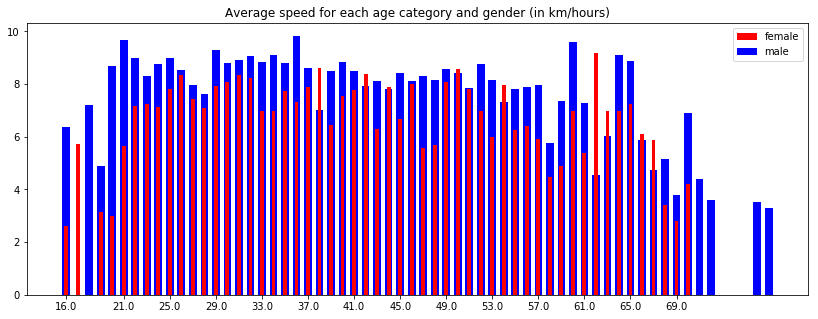

In [17]:


# evalutate with histogram
plt.figure(figsize=(14,5))

keys = sorted(dist_men.keys())[:-1] 
x = list(map(float, keys))
maleplot = plt.bar(x, spd_men, color='blue', width=1/1.5, label = 'male')

keys = sorted(dist_fem.keys())[:-1] 
x = list(map(float, keys))
femaleplot = plt.bar(x, spd_fem, color='red', width=0.5/1.5, label = "female")

#plt.hist(cols, 10)
plt.xticks(x[0::4], [e for e in x[0::4]])
#plt.axis([minyear, maxyear, minamp, maxamp])
plt.title('Average speed for each age category and gender (in km/hours)')
lines = [femaleplot, maleplot]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels)
plt.show()

Ouff! It took a lot of calculation!

OBSERVATION: Even though error bars are missing, the above plot tends to confirms that Seattle guys tend to ride "slightly" faster than Seattle girls. As expected we can also see that older riders tend to ride slower, as expected.  

QUESTION: Do guys ride over longuer distances then women?

BY THE WAY: below 10 km/hours on average... That's not very fast.

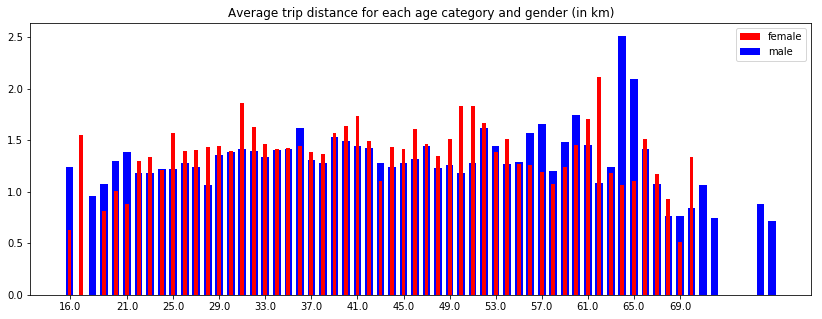

In [18]:

# evalutate with histogram
plt.figure(figsize=(14,5))

keys = sorted(dist_men.keys())[:-1] 
x = list(map(float, keys))
maleplot = plt.bar(x, avd_men, color='blue', width=1/1.5, label = 'male')

keys = sorted(dist_fem.keys())[:-1] 
x = list(map(float, keys))
femaleplot = plt.bar(x, avd_fem, color='red', width=0.5/1.5, label = 'female')

#plt.hist(cols, 10)
plt.xticks(x[0::4], [e for e in x[0::4]])
#plt.axis([minyear, maxyear, minamp, maxamp])
plt.title('Average trip distance for each age category and gender (in km)')
lines = [femaleplot, maleplot]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels)
plt.show()

OBSERVATION: It seams like girls tend to travel further that guys but it is not that clear from the above graph.

## Conclusion

From the above analysis, it seams like with this dataset we could tell if the rider is a men or a women based on the information we have. We might also be able to predict the riders age. This is what we will try to do in the second part of this analysis.

We will then try these predictions on the "pass-holder" subset to see if we can learn something about them. 